<a href="https://colab.research.google.com/github/Matias-Bustamante/RedNeuronal/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

X_train=pd.read_csv("X_train.csv")
Y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')
x_test=pd.read_csv('X_test.csv')




In [20]:
##Vemos los datos
print(X_train)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0            4          90.0        75.0  2125.0          14.5          74   
1            4         140.0        88.0  2890.0          17.3          79   
2            8         350.0       160.0  4456.0          13.5          72   
3            4         105.0        63.0  2125.0          14.7          82   
4            4          97.0        67.0  2145.0          18.0          80   
..         ...           ...         ...     ...           ...         ...   
309          6         200.0        85.0  2990.0          18.2          79   
310          8         400.0       180.0  4220.0          11.1          77   
311          4         108.0        93.0  2391.0          15.5          74   
312          4          83.0        61.0  2003.0          19.0          74   
313          4         107.0        86.0  2464.0          15.5          76   

     Europe  Japan  USA  
0         0      0    1  
1         0

In [25]:
print(X_train.shape)

(314, 9)


In [26]:
def crearNormalizador(data):
  normalizer=Normalization(axis=-1)
  normalizer.adapt(np.array(data))
  return normalizer

In [28]:
normalizador=crearNormalizador(X_train)

In [34]:
from keras.api._v2.keras import activations
def crear_red_neuronal(norm):
  model=Sequential([
      norm,
      Dense(32, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
  ])
  model.compile(loss='mean_absolute_error', optimizer=Adam(0.01))
  return model

In [35]:
red=crear_red_neuronal(normalizador)

In [49]:
history=red.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=1,
    epochs=1000
)

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.9000 - val_loss: 2.3652
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.8513 - val_loss: 2.3687
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.9584 - val_loss: 2.4850
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.8916 - val_loss: 2.5608
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.9739 - val_loss: 2.4375
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.0273 - val_loss: 2.5364
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.9506 - val_loss: 2.4052
Epoch 8/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.9001 - val_loss: 2.3388
Epoch 9/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.8770 - val_loss: 2.3566
Epoch 10/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.9538 - val_loss: 2.4169
Epoch 11/1000
8/

In [50]:
red.evaluate(X_train, Y_train, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.8183


0.8183056116104126

In [51]:
#Crear Predicciones
y_pred=red.predict(x_test).flatten()

3/3 [==============================] - 0s 4ms/step


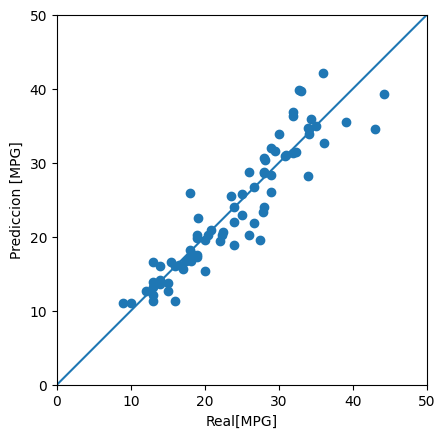

In [52]:
grafico=plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real[MPG]')
plt.ylabel('Prediccion [MPG]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)